<a href="https://colab.research.google.com/github/mrigakshipandey/Personal/blob/master/RandomTestLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B Tech Final Year Major Project**

Sequence prediction of RNGs



In [0]:
#Install dependency Libraries
!pip install tensorflow #LSTM implementation
!pip install numpy #matrix manipulation
!pip install pandas #data structure
!pip install matplotlib #visualiation
!pip install scikit-learn #Scaling

#import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import io
import random
%matplotlib inline

In [0]:
#Write random data to a file
file = open("Random.csv", "w" )
file.write("num\n")
for i in range(10000):
  line = random.randint(0, 1)
  file.write(str(line)+"\n")
file.close()

In [0]:
#Read the csv
file=pd.read_csv('Random.csv')
file.head()

,num
0,0
1,1
2,0
3,0
4,0


In [0]:
#get data
data_to_use=file['num'].values
data_to_use

array([0, 1, 0, ..., 0, 0, 1])

In [0]:
#data preprocessing
'''Standardizing a dataset involves rescaling the distribution of values 
so that the mean of observed values is 0 and the standard deviation is 1.'''

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_to_use.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


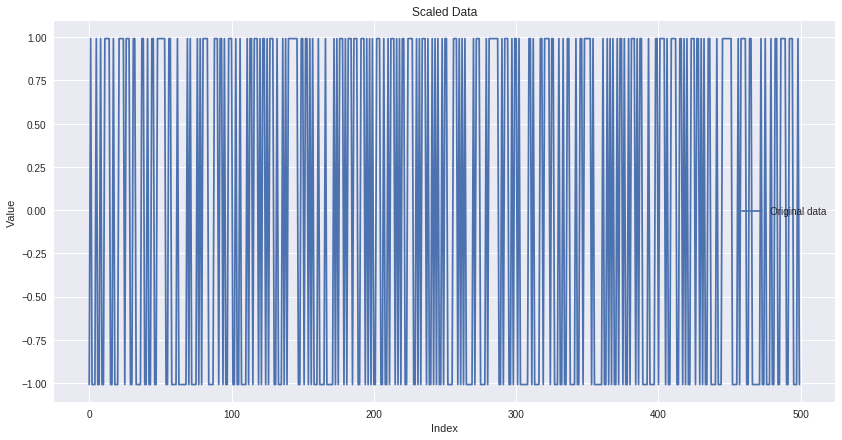

In [0]:
#we now plot the data
plt.figure(figsize=(14, 7))
plt.title('Scaled Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.plot(scaled_data[0:500], label='Original data')
plt.legend()
plt.show()

In [0]:
def window_data(data, window_size):
  X=[]
  y=[]
  
  i=0
  while(i+window_size)<=len(data)-1:
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
    
    i+=1
  assert len(X)==len(y)
  return X,y
  
x,y=window_data(scaled_data,100)

In [0]:
#Seggragating testing and training dataset
import math
p=math.ceil(0.8*len(x))

x_train=np.array(x[:p])
y_train=np.array(y[:p])

x_test=np.array(x[p:])
y_test=np.array(y[p:])

print("X_train size : {}".format(x_train.shape))
print("y_train size : {}".format(y_train.shape))
print("X_test size : {}".format(x_test.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (7920, 100, 1)
y_train size : (7920, 1)
X_test size : (1980, 100, 1)
y_test size : (1980, 1)


In [0]:
#RNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras import metrics

max_features = 100

model = Sequential()
model.add(LSTM(256, input_shape=(100,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Using TensorFlow backend.


Epoch 1/10
 - 44s - loss: 1.0007 - acc: 0.0000e+00
Epoch 2/10
 - 44s - loss: 1.0003 - acc: 0.0000e+00
Epoch 3/10
 - 43s - loss: 0.9995 - acc: 0.0000e+00
Epoch 4/10
 - 43s - loss: 0.9994 - acc: 0.0000e+00
Epoch 5/10
 - 44s - loss: 0.9996 - acc: 0.0000e+00
Epoch 6/10
 - 43s - loss: 0.9995 - acc: 0.0000e+00
Epoch 7/10
 - 44s - loss: 0.9992 - acc: 0.0000e+00
Epoch 8/10
 - 43s - loss: 0.9994 - acc: 0.0000e+00
Epoch 9/10
 - 44s - loss: 0.9993 - acc: 0.0000e+00
Epoch 10/10
 - 43s - loss: 0.9989 - acc: 0.0000e+00


In [0]:
from keras import metrics
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict=trainPredict.reshape(1,7920)
y_train = scaler.inverse_transform([y_train])
y_train=y_train.reshape(1,7920)
testPredict = scaler.inverse_transform(testPredict)
testPredict=testPredict.reshape(1,1980)
y_test = scaler.inverse_transform([y_test])
y_test=y_test.reshape(1,1980)
# accuracy
a=tf.keras.backend.eval(metrics.binary_accuracy(y_train, np.float64(trainPredict)))
b=tf.keras.backend.eval(metrics.binary_accuracy(y_test, np.float64(testPredict)))
print(a," ",b)

[0.]   [0.49949494]
